# Comparison of Classifiers

In this notebook, I compare various classifiers, both common (Decision Trees, Logistic Regression) and uncommon (Gaussian Process Classification, Nearest Centroid), on a "bad" dataset (a dataset that is difficult to classify with a high degree of accuracy based on the available features) to get an idea of and a comparison between the predictive power of scikit-learn's estimators with their default parameters.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [2]:
X = df.drop('admit', axis=1)
y = df['admit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,\
                                                    random_state=47)

X_train_std = X_train.copy()
X_test_std = X_test.copy()

scores_table = pd.DataFrame(columns=['Test Score'])
scores_table.index.names = ['Algorithm']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std[['gre','gpa']] = scaler.fit_transform(X_train_std[['gre','gpa']])
X_train_std.head()

,gre,gpa,rank
165,0.954884,1.586648,1
259,0.428915,1.089214,2
335,0.253592,0.827406,1
199,-0.097054,0.984491,4
323,-1.499638,-1.843033,2


In [3]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann.fit(X_train_std, y_train)
ann.score(X_train_std, y_train)

X_test_std[['gre','gpa']] = scaler.transform(X_test_std[['gre','gpa']])

scores_table.loc['ANN'] = ann.score(X_test_std, y_test)

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)
rf.score(X_train_std, y_train)

scores_table.loc['Random Forest'] = rf.score(X_test_std, y_test)

In [5]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train_std, y_train)
logit.score(X_train_std, y_train)

scores_table.loc['Logistic Regression'] = logit.score(X_test_std, y_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(X_train_std, y_train)
kNN.score(X_train_std, y_train)

scores_table.loc['k-Nearest Neighbors (k=5)'] = kNN.score(X_test_std, y_test)

In [7]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train_std, y_train)
svm.score(X_train_std, y_train)

scores_table.loc['Support Vector Machine'] = svm.score(X_test_std, y_test)

In [8]:
rbfsvm = SVC()
rbfsvm.fit(X_train_std, y_train)
rbfsvm.score(X_train_std, y_train)

scores_table.loc['SVM (RBF kernel)'] = rbfsvm.score(X_test_std, y_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_train)
dt.score(X_train_std, y_train)

scores_table.loc['Decision Tree'] = dt.score(X_test_std, y_test)

In [10]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_std, y_train)
nb.score(X_train_std, y_train)

scores_table.loc['Naive Bayes'] = nb.score(X_test_std, y_test)

In [11]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train_std, y_train)
perceptron.score(X_train_std, y_train)

scores_table.loc['Perceptron'] = perceptron.score(X_test_std, y_test)

In [12]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_std, y_train)
adaboost.score(X_train_std, y_train)

scores_table.loc['AdaBoosted Trees'] = adaboost.score(X_test_std, y_test)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier()
gradboost.fit(X_train_std, y_train)
gradboost.score(X_train_std, y_train)

scores_table.loc['Gradient Boosted Trees'] = gradboost.score(X_test_std, y_test)

In [14]:
from sklearn.ensemble import BaggingClassifier
baggedtrees = BaggingClassifier()
baggedtrees.fit(X_train_std, y_train)
baggedtrees.score(X_train_std, y_train)

scores_table.loc['Bagged Trees'] = baggedtrees.score(X_test_std, y_test)

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
extratrees = ExtraTreesClassifier()
extratrees.fit(X_train_std, y_train)
extratrees.score(X_train_std, y_train)

scores_table.loc['Extremely Randomized Trees'] = extratrees.score(X_test_std, y_test)

In [16]:
from sklearn.gaussian_process import GaussianProcessClassifier
gaussianprocess = GaussianProcessClassifier()
gaussianprocess.fit(X_train_std, y_train)
gaussianprocess.score(X_train_std, y_train)

scores_table.loc['Gaussian Process'] = gaussianprocess.score(X_test_std, y_test)

In [17]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
nearestcentroid = NearestCentroid()
nearestcentroid.fit(X_train_std, y_train)
nearestcentroid.score(X_train_std, y_train)

scores_table.loc['Nearest Centroid'] = nearestcentroid.score(X_test_std, y_test)

In [18]:
scores_table.sort_values(['Test Score'], ascending=False)

,Test Score
Algorithm,
Perceptron,0.700000
Gradient Boosted Trees,0.691667
Gaussian Process,0.683333
ANN,0.666667
Naive Bayes,0.666667
Logistic Regression,0.658333
AdaBoosted Trees,0.658333
Random Forest,0.641667
k-Nearest Neighbors (k=5),0.641667


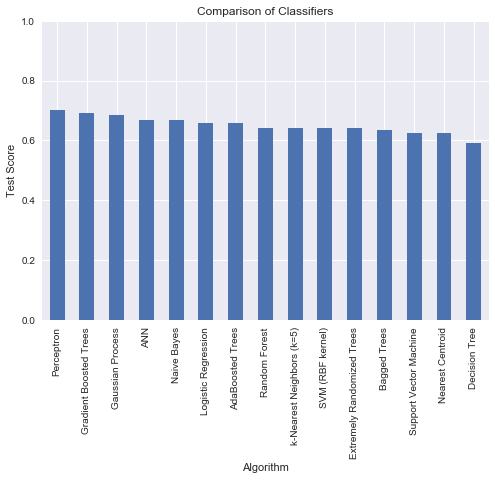

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (12,6))
ax = scores_table.sort_values(['Test Score'], ascending=False).plot(kind='bar', legend=False)
ax.set_ylim([0,1.0])
ax.set_ylabel('Test Score')
ax.set_title('Comparison of Classifiers');